## Who shops Black Friday sales on Thanksgiving Day?

### 1. Introduction

In the United States, Black Friday is the Friday after Thanksgiving, or the last Friday in November. It's a shopping extravaganza in which stores typically open their doors extremely early and offer one-time only deals. In years past, people have been known to form lines outside the stores starting Friday at midnight in order to score the best deals, also known as doorbuster deals, on items that are expected to quickly run out, such as TV's and video game consoles.

In recent years many stores have added a twist: they have started Black Friday on [*Thursday*](https://en.wikipedia.org/wiki/Black_Friday_%28shopping%29#Black_Thursday): Thanksgiving Day itself. It started a few years back with stores opening later in the evening, but JCPenney opened its doors at 2 P.M. on Thanksgiving Day 2017.

A few days before Thanksgiving 2015, [FiveThirtyEight](https://www.fivethirtyeight.com/) surveyed 1,058 respondents on general Thanksgiving [questions](https://github.com/fivethirtyeight/data/tree/master/thanksgiving-2015), such as whether they celebrate Thanksgiving with friends or with family or at all, what types of desserts and turkey stuffings they prefer, etc. They also asked respondents whether they would shop Black Friday sales on Thanksgiving Day itself. In this exploration and visualization, we seek to gain a little more insight on who does Black Friday on Thanksgiving Day using the data collected by FiveThirtyEight.

### 2. Reading the data

The survey data is available at FiveThirtyEight's [Github repository](https://github.com/fivethirtyeight/data/tree/master/thanksgiving-2015). We start by loading the libraries we will be using and then proceed to read the data.

Loading main libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Jupyter magic to make matplotlib lines plots appear inline
%matplotlib inline

Reading the data

In [2]:
tg_data = pd.read_csv("thanksgiving-2015-poll-data.csv", encoding = "Latin-1")
tg_data.shape

(1058, 65)

Those surveyed answered questions on a variety of [Thanksgiving topics](https://github.com/fivethirtyeight/data/tree/master/thanksgiving-2015). We are interested in finding out who shopped Thanksgiving sales across four categories: gender, age, income, and region.

### 3.0 Pivot tables

We can have pandas compute [pivot tables](https://en.wikipedia.org/wiki/Pivot_table#Mechanics) showing the percentages across categories that shopped Black Friday sales on Thanksgiving Day 2015.

#### 3.1 Gender

The survey asked respondents: *"What is your gender?"*. We will rename that column as *"Gender"*. Similarly, the column *"Will you shop any Black Friday sales on Thanksgiving Day?"*, which will be summarized across categories, will be renamed to *"Shopped_BF"*.

In [3]:
tg_data.rename(columns = {"What is your gender?": "Gender",
                          "Will you shop any Black Friday sales on Thanksgiving Day?": "Shopped_BF"}, inplace = True)

We will also change *Shopped_BF* from "Yes" and "No" to 1's and 0's for ease of computation.

In [4]:
def yes_no_to_int(yes_no_string):
    if yes_no_string == "Yes": return 1
    if yes_no_string == "No": return 0

tg_data["Shopped_BF"] = tg_data["Shopped_BF"].apply(yes_no_to_int)    

Now we are ready to create a [pivot table](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html) showing the percentages of males and females that shopped Black Friday sales on Thanksgiving Day 2015.

In [5]:
# Since Shopped_BF is either 1 or 0, the mean value is the fraction of Females or Males that shopped
# BF sales on Thanksgiving
# NaN's are automatically filtered out
gender_pvt_tbl = tg_data.pivot_table(index="Gender", values = "Shopped_BF", aggfunc = (lambda x: 100 * np.mean(x)))
gender_pvt_tbl

,Shopped_BF
Gender,
Female,24.660194
Male,21.990741


#### 3.2 Age

Without further ado, we can have pandas compute the percentages of people that shopped Black Friday sales on Thanksgiving Day 2015 across age groups.

In [6]:
age_pvt_tbl = tg_data.pivot_table(index="Age", values = "Shopped_BF", aggfunc = (lambda x: 100 * np.mean(x)))
age_pvt_tbl

,Shopped_BF
Age,
18 - 29,35.675676
30 - 44,28.936170
45 - 59,20.446097
60+,12.790698


It seems as one ages, Black Friday sales lose their allure, specially if it involves leaving the family on Thanksgiving Day to go elbow to elbow with strangers to buy material goods. On the other hand, one could see the appeal of doorbuster deals on toys for people with families.

#### 3.3 U.S. Region

Similarly for percentages of "Black Thursday" shoppers across U.S. regions.

In [7]:
region_pvt_tbl = tg_data.pivot_table(index="US Region", values = ["Shopped_BF"], aggfunc = (lambda x: 100 * np.mean(x)))
region_pvt_tbl

,Shopped_BF
US Region,
East North Central,24.137931
East South Central,30.357143
Middle Atlantic,23.448276
Mountain,19.512195
New England,12.727273
Pacific,16.153846
South Atlantic,26.600985
West North Central,19.718310
West South Central,31.764706


It seems that across the nation, a large majority of two thirds or more choose not to shop on Thanksgiving.

#### 3.4 Household Income

We will rename *How much total combined money did all members of your HOUSEHOLD earn last year?* to *Household Income*

In [8]:
tg_data.rename(columns = {"How much total combined money did all members of your HOUSEHOLD earn last year?": 
                          "Household Income"}, inplace = True)

We will also escape the dollar sign, "$", which is a special character

In [9]:
tg_data["Household Income"] = tg_data["Household Income"].str.replace("$", "\$")
tg_data["Household Income"].value_counts()

\$25,000 to \$49,999      180
Prefer not to answer      136
\$50,000 to \$74,999      135
\$75,000 to \$99,999      133
\$100,000 to \$124,999    111
\$200,000 and up           80
\$10,000 to \$24,999       68
\$0 to \$9,999             66
\$125,000 to \$149,999     49
\$150,000 to \$174,999     40
\$175,000 to \$199,999     27
Name: Household Income, dtype: int64

In [10]:
income_pvt_tbl = tg_data.pivot_table(index="Household Income", values = "Shopped_BF", aggfunc = (lambda x: 100 * np.mean(x)))
income_pvt_tbl

,Shopped_BF
Household Income,
Prefer not to answer,24.576271
"\$0 to \$9,999",42.307692
"\$10,000 to \$24,999",30.000000
"\$100,000 to \$124,999",16.513761
"\$125,000 to \$149,999",14.583333
"\$150,000 to \$174,999",15.789474
"\$175,000 to \$199,999",19.230769
"\$200,000 and up",15.789474
"\$25,000 to \$49,999",26.506024


As perhaps could be expected, people who earn less are generally more keen to score BF deals.

### 4.0 Bar plots

We can use `matplotlib.pyplot()` to plot the pivot tables so we can visualize the data. Plotting leads to insight more quickly.

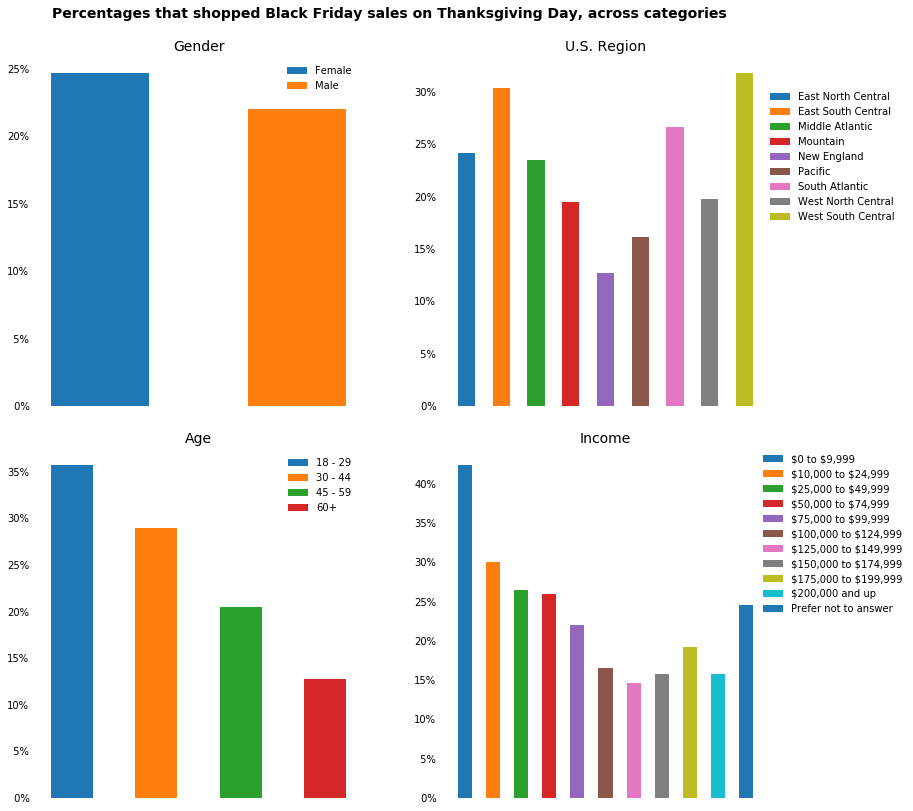

In [13]:
# List of pivot tables
pvt_tbl_list = [gender_pvt_tbl, region_pvt_tbl, age_pvt_tbl, income_pvt_tbl]

# List of income ranges. Doing it by hand b/c the .index() function
# applied to the pivot table sorts them wrong: $100,000 before $25,000, etc.

income_list = ['\$0 to \$9,999', '\$10,000 to \$24,999', '\$25,000 to \$49,999', '\$50,000 to \$74,999',
               '\$75,000 to \$99,999', '\$100,000 to \$124,999', '\$125,000 to \$149,999',
               '\$150,000 to \$174,999', '\$175,000 to \$199,999', '\$200,000 and up', 'Prefer not to answer']

# List of categories list

pvt_tbl_cats_list = [gender_pvt_tbl.index.tolist(), region_pvt_tbl.index.tolist(), age_pvt_tbl.index.tolist(), income_list]

# Subplots' titles
categ_dict = {0: "Gender", 1: "U.S. Region", 2: "Age", 3: "Income"}

fig = plt.figure(figsize=(12, 12))
# Overall plot title
fig.suptitle("Percentages that shopped Black Friday sales on Thanksgiving Day, across categories", fontsize = 14, fontweight = "bold")

for sp in range(0,4):
    ax = fig.add_subplot(2,2,sp+1)
    idx = 0
    rects = []
    # Drawing the bars one at a time
    for categ in pvt_tbl_cats_list[sp]:
        rects.append(ax.bar(x = idx, height = pvt_tbl_list[sp].loc[pvt_tbl_cats_list[sp][idx], "Shopped_BF"] ,width =  0.5))
        idx += 1
    
    # Make plot edges and axes ticks and labels invisible
    for key,spine in ax.spines.items():
        spine.set_visible(False)

    ax.tick_params(bottom="off", top="off", left="off", right="off")

    ax.tick_params(labelbottom='off')
    
    ax. set_title(categ_dict[sp], fontsize = 14)
    
    # Legend
    if (sp % 2) == 0:
        ax.legend(rects, pvt_tbl_cats_list[sp], loc='best', frameon = False)
    else:
        ax.legend(rects, pvt_tbl_cats_list[sp], loc='lower center', bbox_to_anchor=(1.2, 0.5), frameon = False)
    
    # Formatting the y-axis
    vals = ax.get_yticks()
    ax.set_yticklabels(['{:2.0f}%'.format(x) for x in vals])
    
plt.tight_layout(pad=5, w_pad=5, h_pad=2)
plt.show()

Men and women are just about equally likely to shop the Black Friday sales on Thanksgiving Day. The top right plot shows that people in New England and the Pacific coast are much less likely to shop on Thanksgiving than others around the country. The bottom plots depict general downward trends in the allure of shopping Thanksgiving Day as people age or earn more.

### 5. Summary

By means of pivot tables and bar plots, we have gained some insight into how shopping on Thanksgiving Day varies across gender, region, age, and income. It would be a little more interesting still to find out whether the people that shopped on Thanksgiving Day did so by standing in line outside the brick and mortar stores, or online after stuffing themselves with turkey, or both. I could not find out whether the FiveThirtyEight survey specified if shopping referred to brick and mortar shopping only.

### 6.0 References

1. Dataquest. [***Guided Project: Analyzing Thanksgiving Dinner***](https://www.dataquest.io/m/219/guided-project%3A-analyzing-thanksgiving-dinner).

2. Dataquest. [***Exploratory Data Visualization***](https://www.dataquest.io/m/219/guided-project%3A-analyzing-thanksgiving-dinner).

3. Chris and Jianxun Li. [***Format y axis as percent***](https://stackoverflow.com/questions/31357611/format-y-axis-as-percent). July 2015.

4. Gerenuk and orbeckst. [***Matplotlib - global legend and title aside subplots***](https://stackoverflow.com/questions/7526625/matplotlib-global-legend-and-title-aside-subplots). September 2011.